
# Daily and Cumulative Returns Comparisons for Multiple Stocks

Datasets from my github: https://github.com/denisond/technical_analysis/tree/master/data

Let's import some packages that will be helpful for us:

In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import datetime

## Preparing and visualing our dataset 

Now we can write a couple of functions to help find our dataset, read it in, and clean it, all for our date range.

In [2]:
def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index = dates)
    for symbol in symbols:
        # Read and join data for each symbol
        df_temp = pd.read_csv(
            'data/{}.csv'.format(symbol),
            index_col = 'Date', parse_dates = True, 
            usecols = ['Date', 'Adj Close'],
            na_values = ['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp, how = 'inner')
    return df

Below we can call these functions to get an idea of what our series looks like at this point.

In [3]:
dates = pd.date_range('2012-01-01', '2013-09-10')
symbols = ['SPY', 'XOM', 'AAPL']
data = get_data(symbols, dates)
data.head()

,SPY,XOM,AAPL
2012-01-03,126.29,84.40,409.47
2012-01-04,126.49,84.42,411.67
2012-01-05,126.82,84.16,416.24
2012-01-06,126.50,83.53,420.59
2012-01-09,126.80,83.91,419.93


Next let's define a simple fcn so we can start visualizing our data.

In [4]:
def plot_data(df, symbols):
    ax = df.plot(figsize = (20, 10))
    plt.title('{}, {}, & {} Stock Prices'.format(symbols[0], symbols[1], symbols[2]), fontsize = 20)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.tick_params(labelsize = 15)
    ax.legend(loc = 'upper left', fontsize = 20)
    
    plt.show()


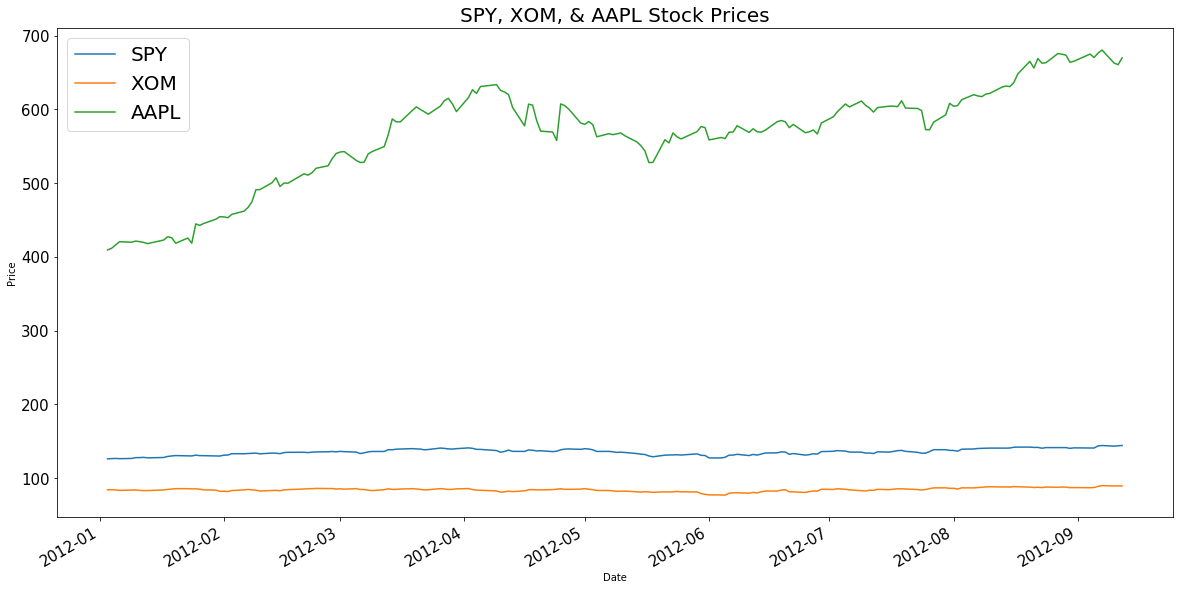

In [5]:
plot_data(data, symbols)

Immediately we see a problem when trying to compare two stocks in terms of price. The movements in price of the less expensive stocks(SPDR S&P 500 ETF Trust and XOM) are much harder to detect than those of apple, due to the scale of the y-axis. 

Daily returns and cumulative returns are two useful metrics for comparing stocks' performances, as well as analyzing the performance one stock by itself. Let's define fcns to create and add these columns to our dataframe.

In [6]:
def daily_returns(df):
    daily_returns = df.copy()
    daily_returns = (df/df.shift(1)) - 1
    daily_returns.iloc[0] = 0
    return daily_returns

def cumulative_returns(df):
    cumulative_returns = df.copy()
    cumulative_returns[1:] = (df[1:]/df.iloc[0].values) - 1
    cumulative_returns.iloc[0] = 0
    return cumulative_returns

In [7]:
daily_returns(data).head()

,SPY,XOM,AAPL
2012-01-03,0.000000,0.000000,0.000000
2012-01-04,0.001584,0.000237,0.005373
2012-01-05,0.002609,-0.003080,0.011101
2012-01-06,-0.002523,-0.007486,0.010451
2012-01-09,0.002372,0.004549,-0.001569


In [8]:
cumulative_returns(data).head()

,SPY,XOM,AAPL
2012-01-03,0.000000,0.000000,0.000000
2012-01-04,0.001584,0.000237,0.005373
2012-01-05,0.004197,-0.002844,0.016534
2012-01-06,0.001663,-0.010308,0.027157
2012-01-09,0.004038,-0.005806,0.025545


We see above the difference between our two columns: daily returns calculates the percentage change from one day's price to the next, whereas cumulative return calculates the aggregate percentage change in price from the first day in the dataframe. 

Now let's plot and compare all 3 of our stocks' prices in terms of daily and cumulative returns.

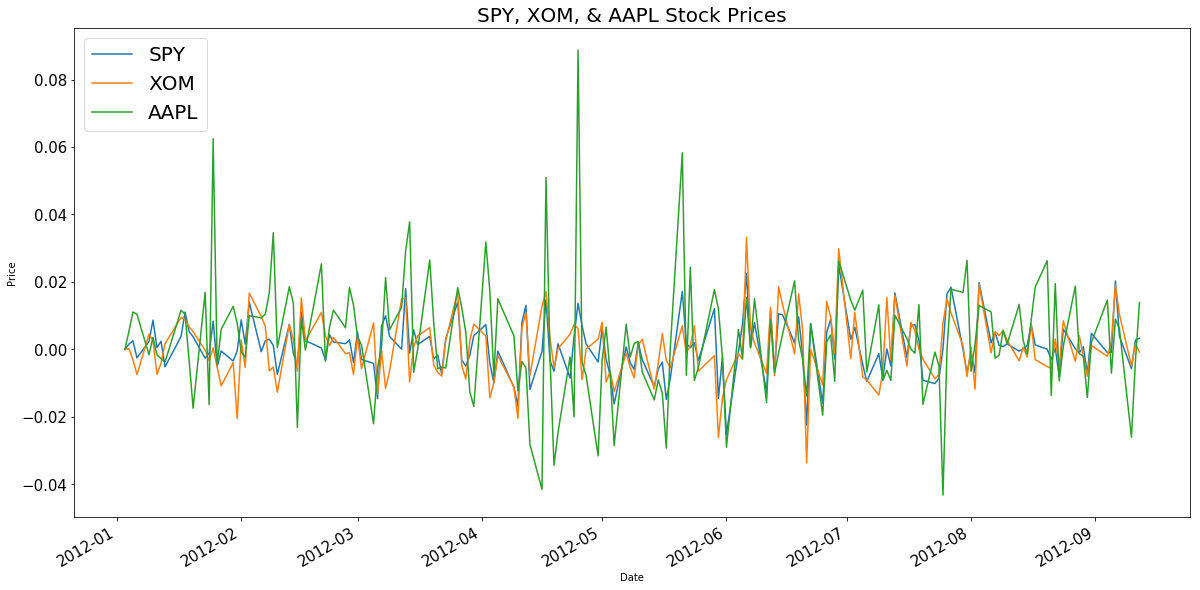

In [9]:
plot_data(daily_returns(data), symbols)

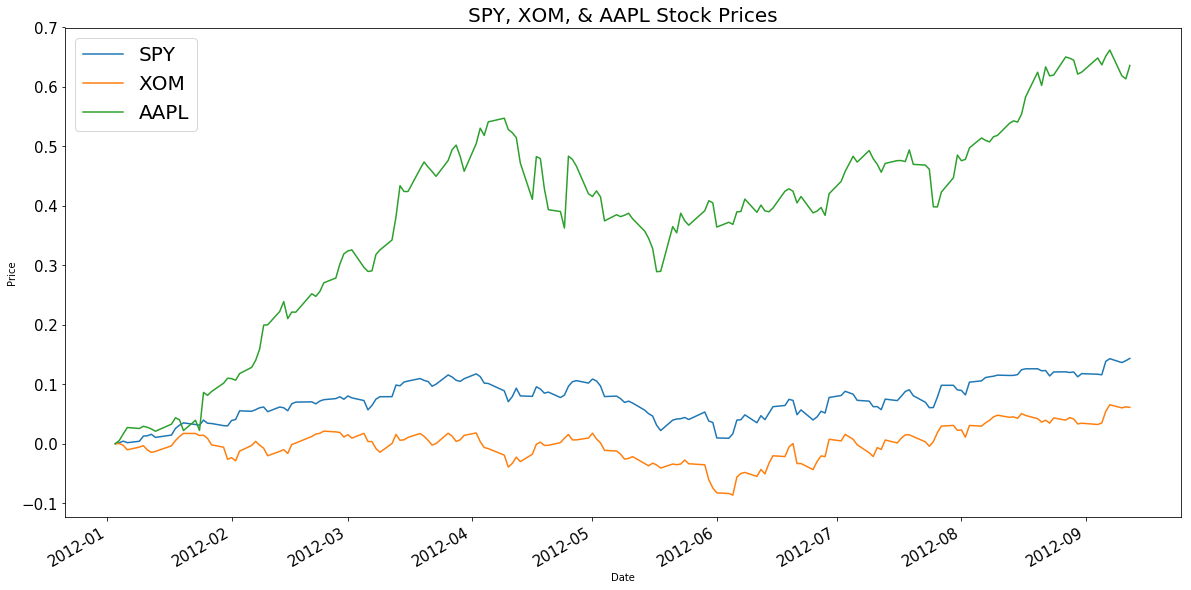

In [10]:
plot_data(cumulative_returns(data), symbols)

It is clear from the cumulative returns plot that Apple stock is much more volatile that the other two stocks. In particular, the highest point in the middle of the plot jumps out. I am curious what happened that caused a 9% daily return in the apple stock, so let's find the date and do a quick google search.

In [11]:
daily_returns(data)['AAPL'].idxmax()

Timestamp('2012-04-25 00:00:00')

Searching "4/25/12 Apple" returns the follwing link as one of the top hits: http://money.cnn.com/2012/04/25/technology/apple-supplier-stocks/index.htm This article describes the reason for Apple's price rising by 9% -- Apple's 2nd quarter earnings were very high due to higher than expected iPhone sales. These are the types of insights we can draw from daily returns.

The cumulative returns plot is also very interesting. Because the prices are normed, we can clearly see Apple outperformed our other stocks during this date-range, whereas before with only the stock price it was much less clear. Moreover, we can see clearly trends that persist amongst all three stocks, perhaps indicating significant economic news or events. These are all things to consider when comparing stocks' performances.